# XGBoost

In [3]:
import seaborn as sns
import pandas as pd
#データ準備
df = sns.load_dataset('titanic')

#欠損値を削除 今回はバギングを試したいだけなのでただ欠損値を落とす
df.dropna(inplace=True)

# X, yを作成
y_col = ['survived','alive']
X = df.drop(columns=y_col)
y = df['survived']

#決定木では、ワンホットエンコーディングではなく、ラベルエンコーディングでもあまり問題ではない
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas') #←これを使うとDataFrameの形で返してくれる
X = oe.fit_transform(X) #　このままではnumpyの形で返ってくる

#hold out
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, 
              eval_metric='auc', 
              early_stopping_rounds=10,
             importanc_type='total_gain',
             random_state=0)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[08:19:05] WARNING: ../src/learner.cc:767: 
Parameters: { "importanc_type" } are not used.

[0]	validation_0-auc:0.89904
[1]	validation_0-auc:0.89663
[2]	validation_0-auc:0.89663
[3]	validation_0-auc:0.89663
[4]	validation_0-auc:0.89663
[5]	validation_0-auc:0.89663
[6]	validation_0-auc:0.89103
[7]	validation_0-auc:0.89103
[8]	validation_0-auc:0.88942
[9]	validation_0-auc:0.89103


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None,
              importanc_type='total_gain', importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [4]:
from sklearn.metrics import roc_auc_score
y_pred_xgb = xgb.predict_proba(X_test)
print(f'xgboost AUC : {roc_auc_score(y_test,y_pred_xgb[:, 1])}')

xgboost AUC : 0.8990384615384616


<AxesSubplot:>

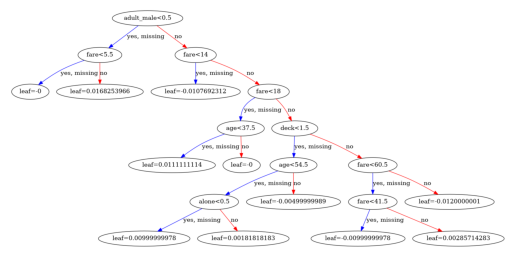

In [5]:
import xgboost
xgboost.plot_tree(xgb, num_tree=0)